# **Portuguese Bank Marketing** 🏦

## 📊 Dataset Overview

This dataset contains information about **direct marketing campaigns** (phone calls) conducted by a Portuguese banking institution. The goal of the campaign was to promote **term deposit subscriptions** — a financial product that boosts bank revenue.

The target variable is `y`, which indicates whether the client **subscribed to a term deposit**:
- `yes`: client subscribed
- `no`: client did not subscribe

---

## 📁 Dataset Shape
- **Rows**: 32,950  
- **Columns**: 16

---

## 🔍 Feature Description

| Column        | Description |
|---------------|-------------|
| `age`         | Age of the client (numeric) |
| `job`         | Type of job (admin, technician, retired, etc.) |
| `marital`     | Marital status (married, single, divorced) |
| `education`   | Education level (basic, high school, university) |
| `default`     | Has credit in default? (yes, no, unknown) |
| `housing`     | Has a housing loan? (yes or no) |
| `loan`        | Has a personal loan? (yes or no) |
| `contact`     | Communication type (cellular or telephone) |
| `month`       | Last contact month (e.g., may, jun) |
| `day_of_week` | Last contact day of the week (e.g., mon, tue) |
| `duration`    | Duration of the last contact in seconds — ⚠️ *should not be used in training* (leaks info) |
| `campaign`    | Number of contacts performed during this campaign |
| `pdays`       | Days since the client was last contacted (-1 means never contacted before) |
| `previous`    | Number of contacts before this campaign |
| `poutcome`    | Outcome of the previous marketing campaign |
| `y`           | **Target**: Has the client subscribed to a term deposit? (yes/no) |

---

## 💡 Notes for Students

- The dataset has **categorical features** that need **encoding**
- Some features may contain **unknown or missing values**
- The target variable is **imbalanced** (~11% said "yes")
- `duration` is highly predictive but should be excluded during training to avoid data leakage
- Great dataset to practice:
  - Exploratory Data Analysis (EDA)
  - Data cleaning & encoding
  - Imbalanced classification techniques
  - Logistic Regression, Decision Trees, SVM, KNN


# **🏆 💥 ML Battle: Predict Term Deposit Subscriptions! 💥**

## 🧠 Machine Learning Challenge: Bank Term Deposit Prediction

You're hired as a data scientist at a Portuguese bank that's losing revenue because clients aren't depositing money as often as before.

Your mission? 🕵️‍♀️  
Build the **most accurate model** to **predict which clients will subscribe** to a term deposit — and help the bank target the right people in its next campaign.

---

### 🏆 Competition Rules

- Your goal is to maximize **accuracy on the test set**.
- Do **not** use the `duration` feature during training (you’ll be disqualified for leakage ⚠️).
- You must split your data into **train/test sets** and optionally use **cross-validation**.
- Use any classification model you want (Logistic Regression, Decision Tree, Random Forest, etc.)
- Preprocess the data (encoding, scaling, handling imbalance) as you see fit.

---

### ⚙️ Requirements

- ✅ Clean the data
- ✅ Encode categorical variables
- ✅ Handle imbalance in target variable `y`
- ✅ Evaluate your model with accuracy, confusion matrix, and classification report

---

### 🎯 Scoring

- Submit your accuracy score.
- We’ll rank the results **live**.
- Top 3 students will get bragging rights... and maybe chocolate 🍫😉

---

### 📛 Disqualification Alert
- Using `duration` for training = **disqualified**
- Copying code = ❌


In [716]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.linear_model import  SGDRegressor,LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

In [717]:
df = pd.read_csv('Bank Marketing.csv')

In [718]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [719]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## EDA

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [721]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  category
 2   marital      32950 non-null  category
 3   education    32950 non-null  category
 4   default      32950 non-null  category
 5   housing      32950 non-null  category
 6   loan         32950 non-null  category
 7   contact      32950 non-null  category
 8   month        32950 non-null  category
 9   day_of_week  32950 non-null  category
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  category
 15  y            32950 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


In [723]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [724]:
df.duplicated().sum()

np.int64(8)

In [725]:
df = df.drop_duplicates()

In [726]:
df.duplicated().sum()

np.int64(0)

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32942 non-null  int64   
 1   job          32942 non-null  category
 2   marital      32942 non-null  category
 3   education    32942 non-null  category
 4   default      32942 non-null  category
 5   housing      32942 non-null  category
 6   loan         32942 non-null  category
 7   contact      32942 non-null  category
 8   month        32942 non-null  category
 9   day_of_week  32942 non-null  category
 10  duration     32942 non-null  int64   
 11  campaign     32942 non-null  int64   
 12  pdays        32942 non-null  int64   
 13  previous     32942 non-null  int64   
 14  poutcome     32942 non-null  category
 15  y            32942 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.9 MB


In [728]:
df = df.reset_index(drop=True)

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32942 entries, 0 to 32941
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32942 non-null  int64   
 1   job          32942 non-null  category
 2   marital      32942 non-null  category
 3   education    32942 non-null  category
 4   default      32942 non-null  category
 5   housing      32942 non-null  category
 6   loan         32942 non-null  category
 7   contact      32942 non-null  category
 8   month        32942 non-null  category
 9   day_of_week  32942 non-null  category
 10  duration     32942 non-null  int64   
 11  campaign     32942 non-null  int64   
 12  pdays        32942 non-null  int64   
 13  previous     32942 non-null  int64   
 14  poutcome     32942 non-null  category
 15  y            32942 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


In [730]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32942.0,40.012810,10.403035,17.0,32.0,38.0,47.0,98.0
duration,32942.0,258.159614,258.995259,0.0,103.0,180.0,319.0,4918.0
campaign,32942.0,2.560804,2.752579,1.0,1.0,2.0,3.0,56.0
pdays,32942.0,962.043440,187.973035,0.0,999.0,999.0,999.0,999.0
previous,32942.0,0.174762,0.499078,0.0,0.0,0.0,0.0,7.0


In [731]:
corr_matrix = df.corr(numeric_only=True)

<Axes: >

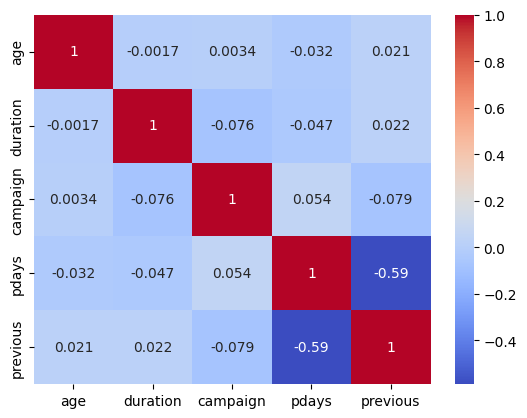

In [732]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')

## sure Imbalance Data 

<Axes: xlabel='y', ylabel='count'>

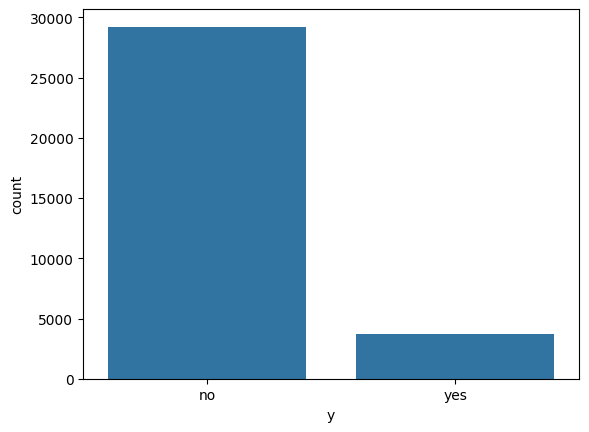

In [733]:
sns.countplot(x='y', data=df)

In [734]:
df['y'].value_counts()

y
no     29230
yes     3712
Name: count, dtype: int64

## Drop unnecessary columns

In [735]:
df.sample(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
20699,57,blue-collar,married,basic.9y,no,yes,no,telephone,may,fri,248,2,999,0,nonexistent,no
32852,32,admin.,single,university.degree,no,yes,no,cellular,aug,mon,255,2,999,0,nonexistent,no


In [736]:
cols_to_drop = ['duration']
#df.drop(columns=cols_to_drop, inplace=True)

## Convert Data

In [737]:
# df["job"] = LabelEncoder().fit_transform(df["job"])
# df["marital"] = LabelEncoder().fit_transform(df["marital"])
# df["education"] = LabelEncoder().fit_transform(df["education"])
# df["default"] = LabelEncoder().fit_transform(df["default"])
# df["housing"] = LabelEncoder().fit_transform(df["housing"])
# df["loan"] = LabelEncoder().fit_transform(df["loan"])
# df["contact"] = LabelEncoder().fit_transform(df["contact"])
# df["month"] = LabelEncoder().fit_transform(df["month"])
# df["day_of_week"] = LabelEncoder().fit_transform(df["day_of_week"])
# df["poutcome"] = LabelEncoder().fit_transform(df["poutcome"])
# df["y"] = LabelEncoder().fit_transform(df["y"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32942 entries, 0 to 32941
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32942 non-null  int64   
 1   job          32942 non-null  category
 2   marital      32942 non-null  category
 3   education    32942 non-null  category
 4   default      32942 non-null  category
 5   housing      32942 non-null  category
 6   loan         32942 non-null  category
 7   contact      32942 non-null  category
 8   month        32942 non-null  category
 9   day_of_week  32942 non-null  category
 10  duration     32942 non-null  int64   
 11  campaign     32942 non-null  int64   
 12  pdays        32942 non-null  int64   
 13  previous     32942 non-null  int64   
 14  poutcome     32942 non-null  category
 15  y            32942 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


In [738]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [739]:
df.head(5)

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32942 entries, 0 to 32941
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            32942 non-null  int64
 1   duration                       32942 non-null  int64
 2   campaign                       32942 non-null  int64
 3   pdays                          32942 non-null  int64
 4   previous                       32942 non-null  int64
 5   job_blue-collar                32942 non-null  int64
 6   job_entrepreneur               32942 non-null  int64
 7   job_housemaid                  32942 non-null  int64
 8   job_management                 32942 non-null  int64
 9   job_retired                    32942 non-null  int64
 10  job_self-employed              32942 non-null  int64
 11  job_services                   32942 non-null  int64
 12  job_student                    32942 non-null  int64
 13  job_technician  

In [741]:
x = df.drop('y_yes', axis = 1)
y = df['y_yes']

In [742]:
# x = df.drop('y', axis = 1)
# y = df['y']

## train & test

In [743]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42, stratify=y)

In [744]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [745]:
model = RandomForestClassifier(n_estimators = 100, random_state=42)

In [746]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [747]:
y_pred = model.predict(x_test)

In [748]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
F1 Score: 0.47


## SMOTE

In [749]:
df['y_yes'].value_counts()

y_yes
0    29230
1     3712
Name: count, dtype: int64

In [750]:
# df['y'].value_counts()

In [751]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [752]:
y_resampled.value_counts()

y_yes
0    21922
1    21922
Name: count, dtype: int64

In [753]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [754]:
y_pred = model.predict(x_test)

In [755]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
F1 Score: 0.51


### GridSearchCV model over

In [756]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [757]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [758]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [759]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [760]:
model=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=3
    )
model.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=3)

In [761]:
y_pred = model.predict(x_test)

In [762]:
y_pp=y_pred

In [763]:
y_pp = (y_pp > 0.5).astype(int)  # Convert probabilities to binary labels

In [764]:
acc = accuracy_score(y_test,y_pp)
f1 = f1_score(y_test,y_pp)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
F1 Score: 0.50


## GridSearchCV model under

In [765]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [766]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [767]:
model=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=3
                   )
model.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=3)

In [768]:
y_pred = model.predict(x_test)

In [769]:
y_pp=y_pred

In [770]:
y_pp = (y_pp > 0.5).astype(int)  # Convert probabilities to binary labels

In [771]:
acc = accuracy_score(y_test,y_pp)
f1 = f1_score(y_test,y_pp)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
F1 Score: 0.54


### Random Under-sampling

In [772]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [773]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(x_test)

In [774]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
F1 Score: 0.54


## GradientBoosting Model under

In [775]:
rus = RandomUnderSampler(random_state=42)
X_ress, y_ress = rus.fit_resample(x_train, y_train)

In [776]:
model=GradientBoostingClassifier(loss="log_loss",n_estimators=300,max_depth=6,learning_rate=0.04,max_features=5)
model.fit(X_ress,y_ress)

GradientBoostingClassifier(learning_rate=0.04, max_depth=6, max_features=5,
                           n_estimators=300)

In [777]:
y_pred = model.predict(x_test)

In [778]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
F1 Score: 0.55


## GradientBoosting Model over

In [779]:
smote = SMOTE(random_state=42)
X_rees, y_rees = smote.fit_resample(x_train, y_train)

In [780]:
model=GradientBoostingClassifier(loss="log_loss",
                                 n_estimators=100,
                                 max_depth=4,
                                 learning_rate=0.05)
model.fit(X_rees,y_rees)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4)

In [781]:
y_pred = model.predict(x_test)

In [782]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.89
F1 Score: 0.57


### XGBoost Model over

In [783]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)

In [784]:
model=XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    gamma=0,
    reg_lambda=1,
    objective="binary:logistic"
)

In [785]:
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [786]:
y_pred = model.predict(x_test)

In [787]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.89
F1 Score: 0.56


## XGBoost Model under

In [788]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(x_train, y_train)

In [789]:
model=XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    gamma=0,
    reg_lambda=1,
    objective="binary:logistic"
)

In [790]:
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [791]:
y_pred = model.predict(x_test)

In [792]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
F1 Score: 0.55


### LogisticRegression model

In [793]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [794]:
y_pred = model.predict(x_test)

In [795]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
F1 Score: 0.55
